In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
run_names1 = ["gsm8k_fft_rand0+", "gsm8k_fft_easy1+", "gsm8k_fft_easy5+", "gsm8k_fft_easy20+", ]
run_names2 = ["gsm8k_fft_rand0+", "gsm8k_fft_rand1+", "gsm8k_fft_rand5+", "gsm8k_fft_rand20+", ]

In [3]:
test_pass_5s_1 = []
for run_name in run_names1:
    test_answer_types = np.load(f"../ckpts/{run_name}/test_answer_types_gsm8k.npy")
    test_answer_correct = test_answer_types==0
    print(test_answer_correct.shape)
    test_pass_5 = test_answer_correct.mean(axis=1)
    print(run_name, np.mean(test_pass_5))
    test_pass_5s_1.append(test_pass_5)
    
test_pass_5s_1 = np.array(test_pass_5s_1)

(1319, 10)
gsm8k_fft_rand0+ 0.3059893858984079
(1319, 10)
gsm8k_fft_easy1+ 0.3166793025018954
(1319, 10)
gsm8k_fft_easy5+ 0.3045489006823351
(1319, 10)
gsm8k_fft_easy20+ 0.26679302501895374


In [4]:
test_pass_5s_2 = []
for run_name in run_names2:
    test_answer_types = np.load(f"../ckpts/{run_name}/test_answer_types_gsm8k.npy")
    test_answer_correct = test_answer_types==0
    test_pass_5 = test_answer_correct.mean(axis=1)
    print(run_name, np.mean(test_pass_5))
    test_pass_5s_2.append(test_pass_5)
    
test_pass_5s_2 = np.array(test_pass_5s_2)

gsm8k_fft_rand0+ 0.3059893858984079
gsm8k_fft_rand1+ 0.2919636087945413
gsm8k_fft_rand5+ 0.29567854435178165
gsm8k_fft_rand20+ 0.27862016679302504


In [5]:

dataset_sizes = []
model_path = f"../ckpts/gsm8k_fft_full_constantlr/checkpoint-{str(1557)}/"        
correct = (np.load(os.path.join(model_path, "train_answer_types.npy"))==0)
for subsample_numtraincorrect in [0, 1, 5, 20]:
    subsample_idxs_len = (correct.sum(axis=-1)>= subsample_numtraincorrect).sum()
    dataset_sizes.append(subsample_idxs_len)

Text(0.5, 1.0, 'GSM8k')

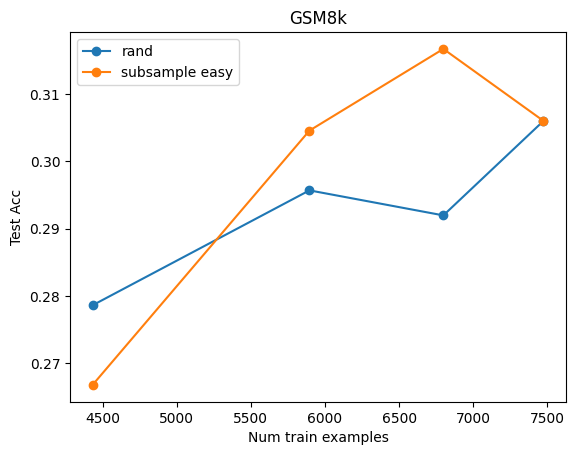

In [9]:
plt.plot(dataset_sizes, np.mean(test_pass_5s_2, axis=1), "o-", label="rand")
plt.plot(dataset_sizes, np.mean(test_pass_5s_1, axis=1), "o-", label="subsample easy")

plt.ylabel("Test Acc")
plt.xlabel("Num train examples")
plt.legend()
plt.title("GSM8k")

In [11]:
full_correct = []
for checkpoint in [311, 1557, 3110]:
    model_path = f"../ckpts/gsm8k_fft_full_constantlr/checkpoint-{str(checkpoint)}/"        
    correct = (np.load(os.path.join(model_path, "train_answer_types.npy"))==0)
    full_correct.append(correct)
full_correct = np.array(full_correct)

(array([1668., 1026.,  941.,  947.,  751.,  678.,  567.,  400.,  301.,
         194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

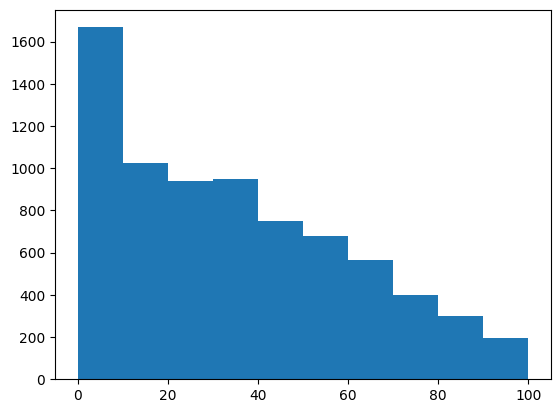

In [14]:
plt.hist(full_correct.sum(axis=-1).mean(axis=0))

In [23]:
(full_correct.sum(axis=-1).mean(axis=0)>=0).sum()

7473